<a href="https://colab.research.google.com/github/matusoff/DataVisialization_GoogleTrends/blob/main/Data_Visualisation_GoogleTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import io

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [ ]:
df_tesla = pd.read_csv('/content/sample_data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('/content/sample_data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/content/sample_data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('/content/sample_data/UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_19 = pd.read_csv('/content/sample_data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [ ]:
from pandas.core import describe
print(df_tesla.shape)
df_tesla.head(), df_tesla.describe()
df_tesla.tail()

(124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007
123,2020-09-01,31,407.339996


In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
type(df_tesla.MONTH)

pandas.core.series.Series

### Unemployment Data

In [ ]:
print(df_unemployment.shape)
df_unemployment.head(), df_unemployment.tail()

(200, 3)


(     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
 0  2004-01                       9     5.7
 1  2004-02                       8     5.6
 2  2004-03                       7     5.8
 3  2004-04                       8     5.6
 4  2004-05                       6     5.6,
        MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
 195  2020-04                     100    14.7
 196  2020-05                      63    13.3
 197  2020-06                      53    11.1
 198  2020-07                      54    10.2
 199  2020-08                      50     8.4)

In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [ ]:
print(df_btc_search.shape) 
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [ ]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [ ]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isnull().sum().sum()}')
print(f'Missing values for U/E?: {df_unemployment.isnull().sum().sum()}')
print(f'Missing values for BTC Search?: {df_btc_search.isnull().sum().sum()}')

Missing values for Tesla?: 0
Missing values for U/E?: 0
Missing values for BTC Search?: 0


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isnull().sum().sum()}')
#missing_values = df_tesla.isnull().sum().sum() + df_unemployment.isnull().sum().sum + df_btc_search.isnull().sum().sum() + df_btc_price.isnull().sum().sum()

Missing values for BTC price?: 2


In [ ]:
print(f'Number of missing values: ')

Number of missing values: 


Remove any missing values that you found. 

In [ ]:
df_btc_price.isna().values.sum()

2

### Convert Strings to DateTime Objects

Convert any strings in to Datetime objects in all 4 DataFrames. Double check if your type conversion was successful.

In [ ]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [ ]:
type(df_tesla.MONTH)

pandas.core.series.Series

In [ ]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [ ]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [ ]:
df_btc_monthly.shape, df_btc_monthly.head()

((73, 3),                  DATE       CLOSE      VOLUME
 DATE                                         
 2014-09-30 2014-09-30  386.944000  34707300.0
 2014-10-31 2014-10-31  338.321014  12545400.0
 2014-11-30 2014-11-30  378.046997   9194440.0
 2014-12-31 2014-12-31  320.192993  13942900.0
 2015-01-31 2015-01-31  217.464005  23348200.0)

# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis
#DateFormatter() will help to specify how we want to display the dates. 
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')


In [ ]:
# Register date converters to avoid warning messages


### Tesla Stock Price v.s. Search Volume

Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes.  

Text(0, 0.5, 'TSLA Web Search')

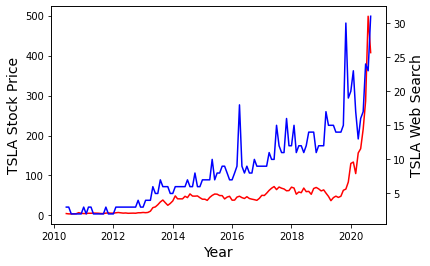

In [ ]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, "r-")  #red
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, "blue") 
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('TSLA Stock Price', fontsize=14)
ax2.set_ylabel('TSLA Web Search', fontsize=14)

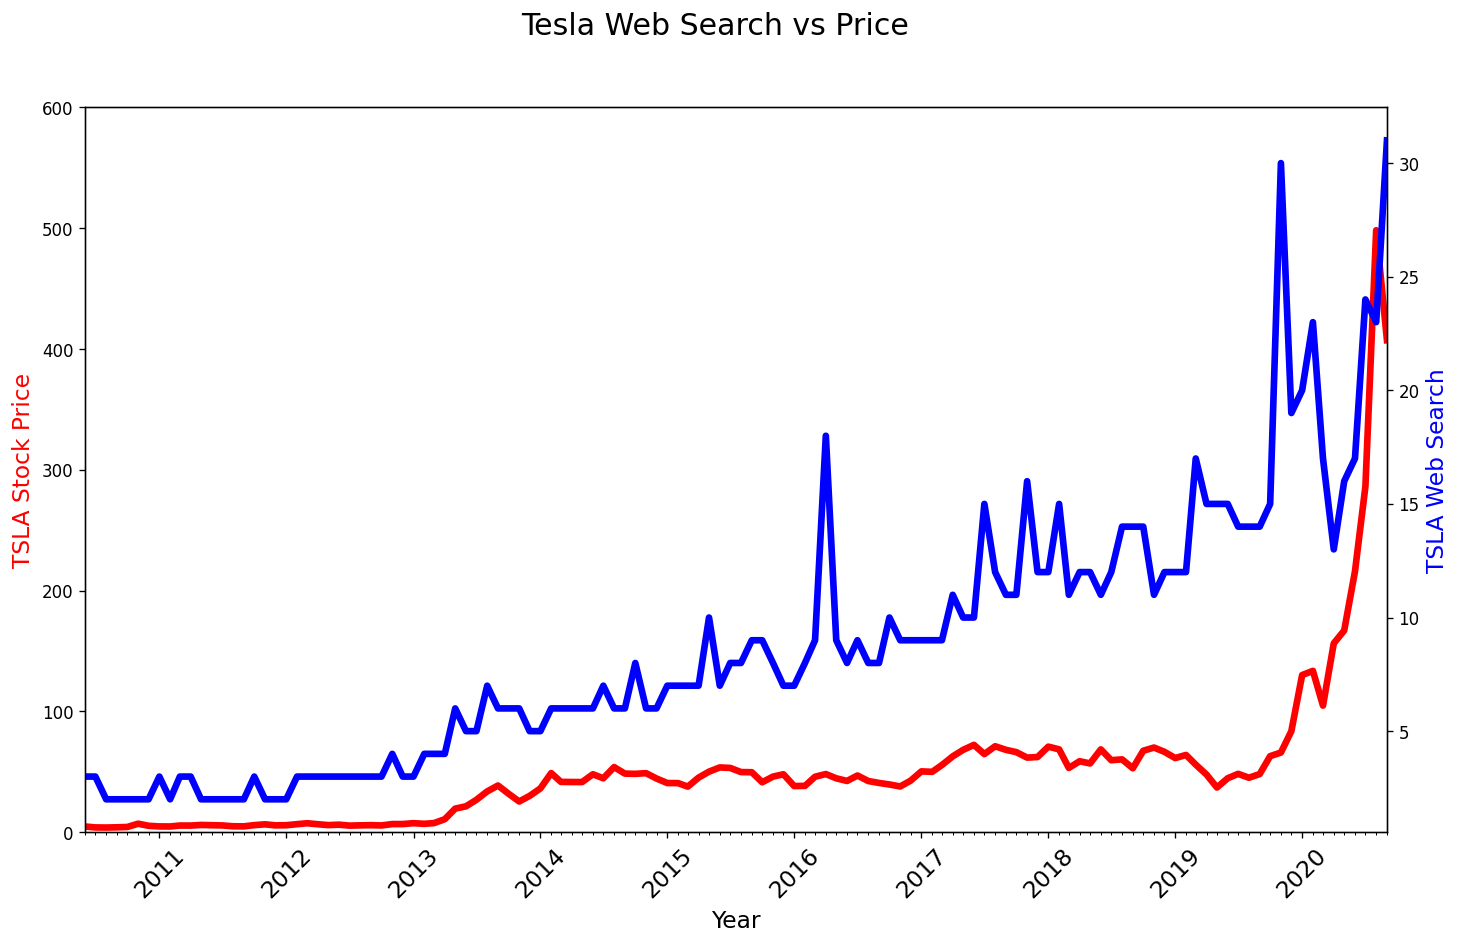

In [ ]:
plt.figure(figsize=(14,8), dpi=120) #increase the figure size and resolution
plt.suptitle('Tesla Web Search vs Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, "r-", linewidth=4)  #red
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, "blue", linewidth=4) 


ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('TSLA Stock Price', color="red", fontsize=14)
ax2.set_ylabel('TSLA Web Search', color="blue", fontsize=14)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


### Bitcoin (BTC) Price v.s. Search Volume

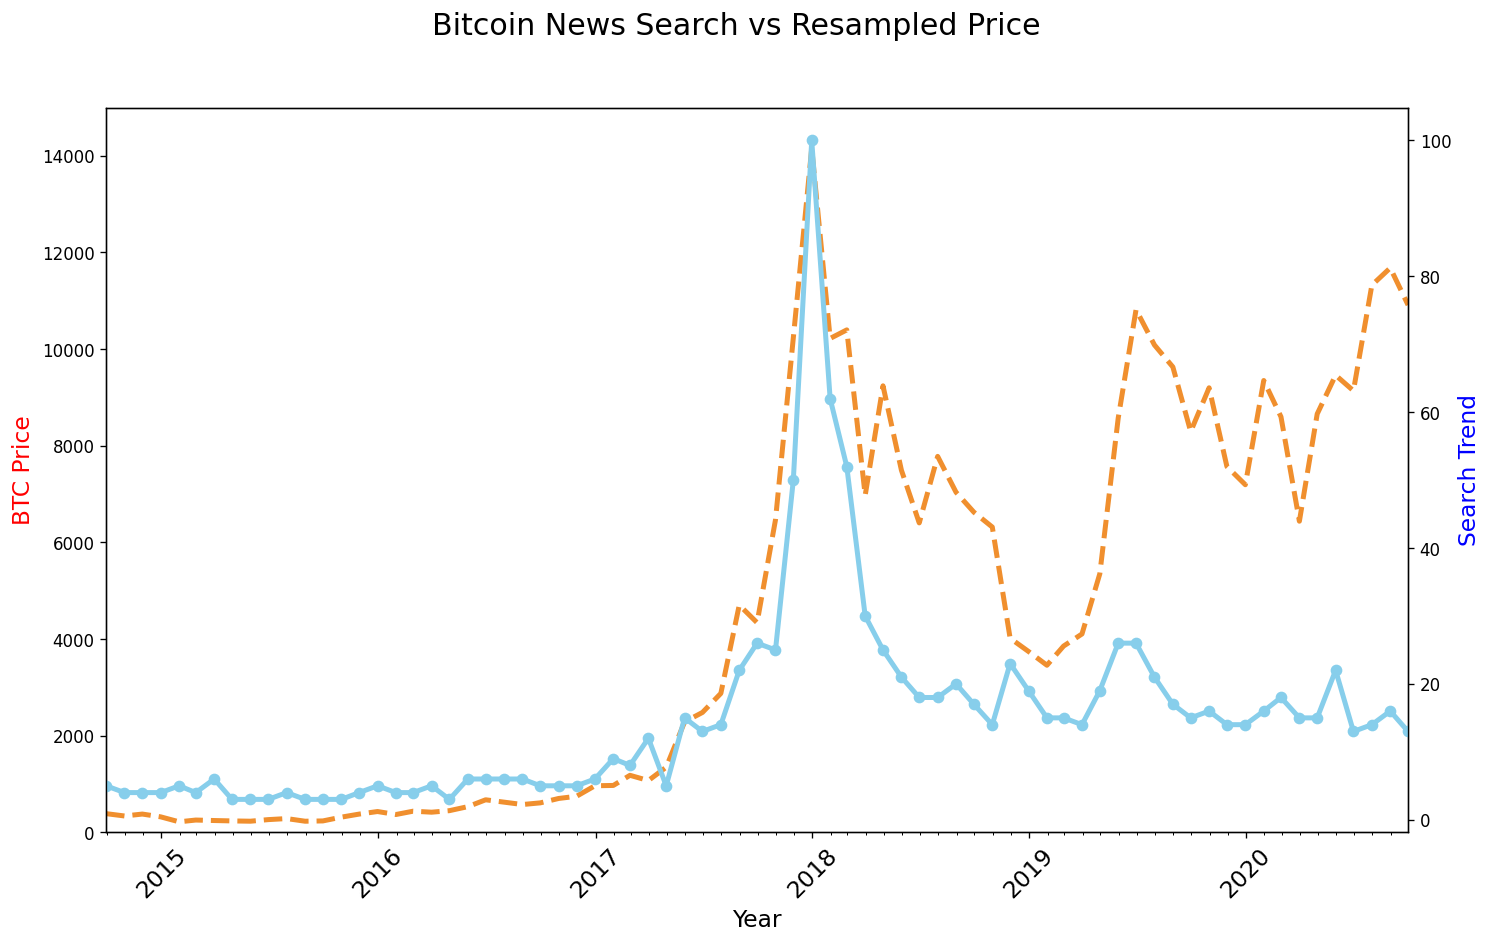

In [ ]:
plt.figure(figsize=(14,8), dpi=120) #increase the figure size and resolution
plt.suptitle('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

# Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 20000])
# ax1.set_xlim([df_btc_price.DATE.min(), df_btc_price.DATE.max()])

# ax1.plot(df_btc_price.DATE, df_btc_price.CLOSE, "r-", linewidth=2, linestyle='dashed')  #red
# ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, "blue", linewidth=2, marker='o') 


ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('BTC Price', color="red", fontsize=14)
ax2.set_ylabel('Search Trend', color="blue", fontsize=14)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
 
# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='dashed')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 
         color='skyblue', linewidth=3, marker='o')

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

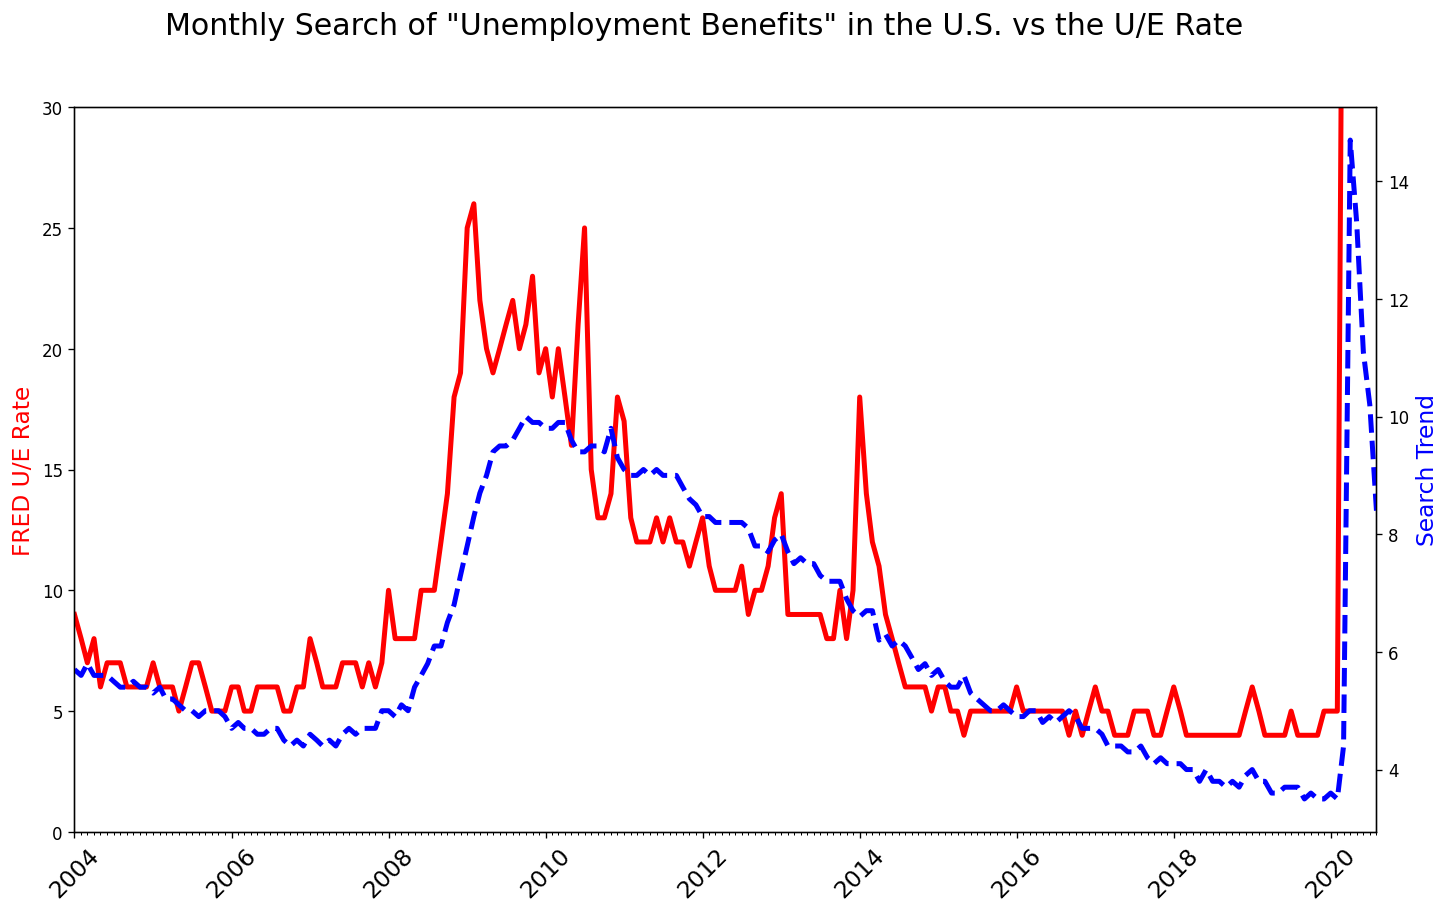

In [ ]:
plt.figure(figsize=(14,8), dpi=120) #increase the figure size and resolution
plt.suptitle('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

# Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 20000])
# ax1.set_xlim([df_btc_price.DATE.min(), df_btc_price.DATE.max()])

# ax1.plot(df_btc_price.DATE, df_btc_price.CLOSE, "r-", linewidth=2, linestyle='dashed')  #red
# ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, "blue", linewidth=2, marker='o') 

ax1.set_ylabel('FRED U/E Rate', color='red', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=30)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
 
# linestyle and markers
ax1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,
         color='red', linewidth=3)
ax2.plot(df_unemployment.MONTH, df_unemployment.UNRATE,
         color='blue', linewidth=3, linestyle='dashed')

Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment.


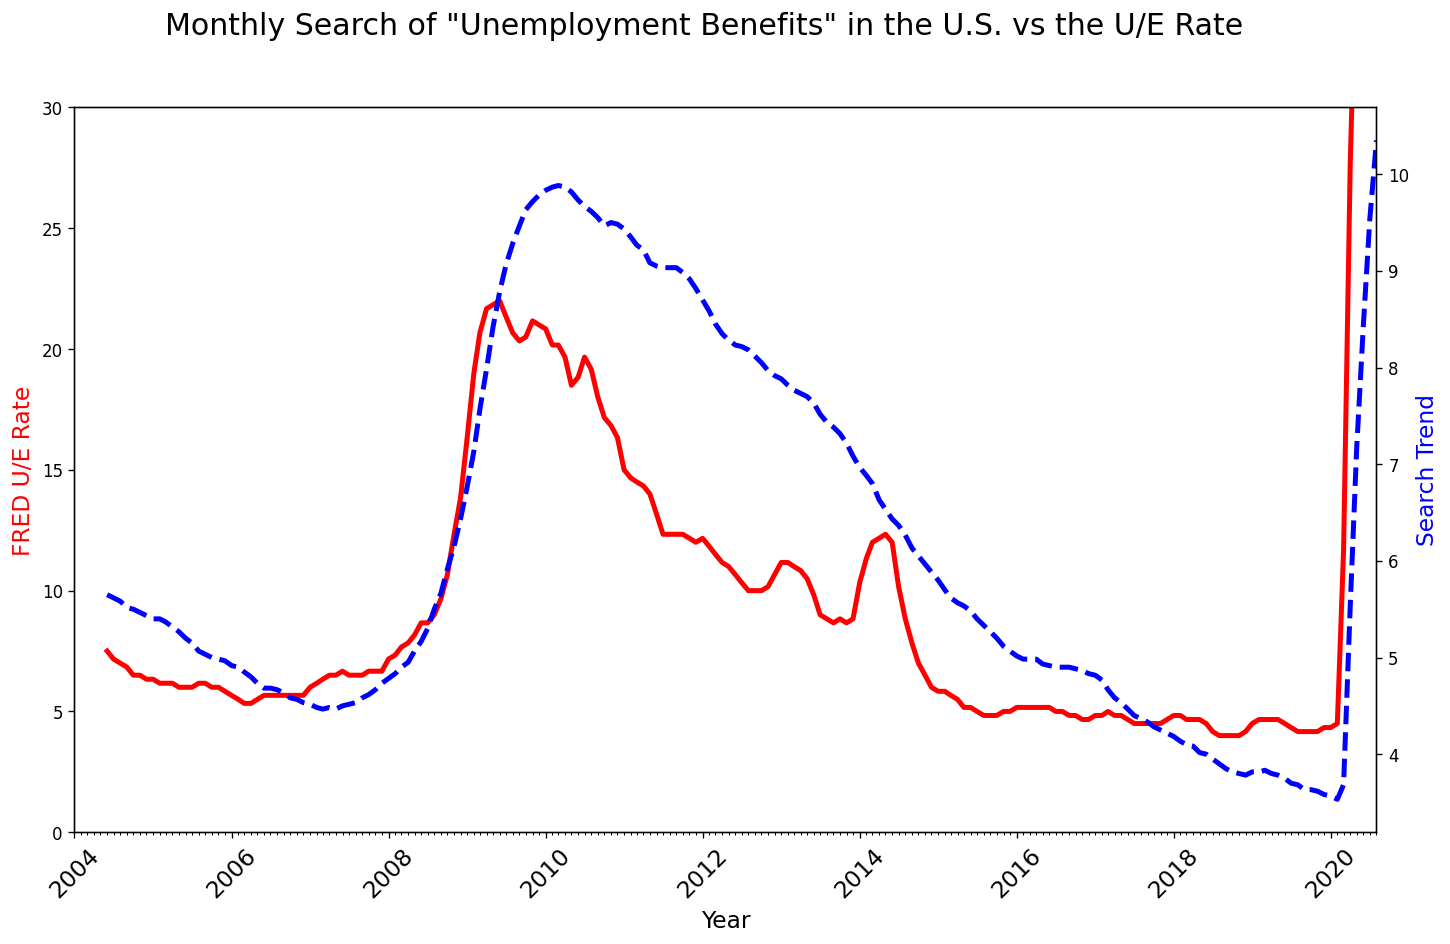

In [ ]:
plt.figure(figsize=(14,8), dpi=120) #increase the figure size and resolution
plt.suptitle('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color="red", fontsize=14)
ax2.set_ylabel('Search Trend', color="blue", fontsize=14)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

#UE_BENEFITS_WEB_SEARCH  UNRATE
ax1.set_ylim(bottom=0, top=30)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
 
# linestyle and markers
ax1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH.rolling(6).mean(), 
         color='red', linewidth=3)
ax2.plot(df_unemployment.MONTH, df_unemployment.UNRATE.rolling(6).mean(),
         color='blue', linewidth=3, linestyle='dashed')